Model Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       194
        Poor       1.00      1.00      1.00         6

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



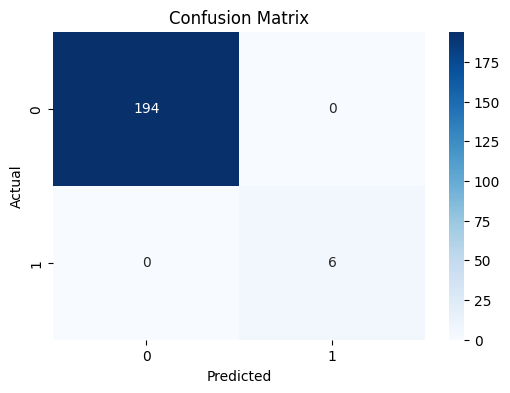

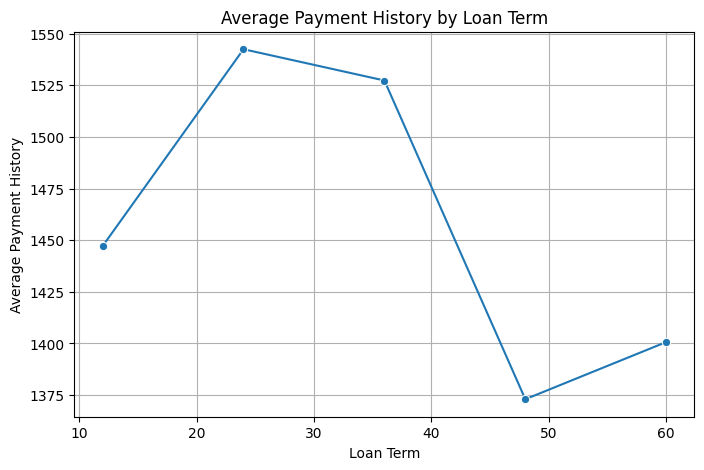

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv("credit_scoring.csv")

df["Credit_Score"] = df["Payment History"].apply(
    lambda x: "Good" if x > 80 else ("Average" if x > 65 else "Poor")
)

X = df.drop(columns=["Credit_Score"])
y = df["Credit_Score"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Model Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

avg_payment = df.groupby("Loan Term")["Payment History"].mean()

plt.figure(figsize=(8,5))
sns.lineplot(x=avg_payment.index, y=avg_payment.values, marker="o")
plt.title("Average Payment History by Loan Term")
plt.xlabel("Loan Term")
plt.ylabel("Average Payment History")
plt.grid(True)
plt.show()
